In [35]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

In [36]:
import tensorflow as tf

In [37]:
##### 전이학습 시작 #####

In [38]:
(train_images_raw, train_labels_raw), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

In [39]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_images = preprocess_input(input_images)
  return output_images

In [40]:
train_images = train_images_raw[:45000]
train_labels = train_labels_raw[:45000]

In [41]:
valid_images = train_images_raw[40000:]
valid_labels = train_labels_raw[40000:]

In [43]:
train_X = preprocess_image_input(train_images)
valid_X = preprocess_image_input(valid_images)

In [44]:
feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224,224,3),
                                                include_top=False,
                                                weights='imagenet')

In [45]:
feature_extractor.trainable = True

In [46]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)
x = feature_extractor(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
# output classification count: 20
outputs = tf.keras.layers.Dense(20, activation="softmax", name="classification")(x)

In [47]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [48]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_1 (UpSampling  (None, 224, 224, 3)      0         
 2D)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 512)               5248

In [50]:
EPOCHS = 5

history = model.fit(train_X, train_labels, epochs=EPOCHS,
                    validation_data=(valid_X, valid_labels), batch_size=100, shuffle=True)

Epoch 1/5
450/450 [==============================] - 477s 1s/step - loss: 1.1409 - accuracy: 0.6552 - val_loss: 0.6189 - val_accuracy: 0.8031
Epoch 2/5
450/450 [==============================] - 479s 1s/step - loss: 0.4179 - accuracy: 0.8656 - val_loss: 0.3640 - val_accuracy: 0.8853
Epoch 3/5
450/450 [==============================] - 480s 1s/step - loss: 0.2056 - accuracy: 0.9371 - val_loss: 0.2872 - val_accuracy: 0.9154
Epoch 4/5
450/450 [==============================] - 479s 1s/step - loss: 0.0912 - accuracy: 0.9780 - val_loss: 0.2623 - val_accuracy: 0.9241
Epoch 5/5
450/450 [==============================] - 479s 1s/step - loss: 0.0417 - accuracy: 0.9922 - val_loss: 0.2584 - val_accuracy: 0.9300


In [51]:
test_images = preprocess_image_input(test_images)
results = model.evaluate(test_images, test_labels)
test = model.predict(test_images)
print(results[1])

313/313 [==============================] - 30s 95ms/step
0.8661999702453613


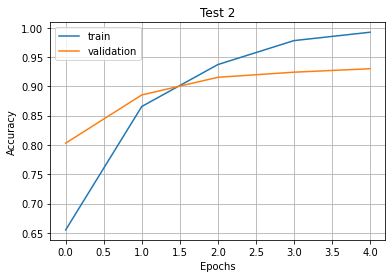

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test 2')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.grid()
plt.show()